In [1]:
import numpy
import os
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
def bankShow(bank):
    ''' bankShow(bank)
    
    Show the feature banks learned by convolutional K-means
    bank: numpy array, m cluster by n features, features learned from ckmeans,
    Return: None '''
    N = 10
    i = 0
    while i < bank.shape[0]:
    
        fig = plt.figure(figsize = (15, 5)) # new figure 
        k = 1
        while k <= N and i < bank.shape[0]:
            img = bank[i, ...]
            img = numpy.reshape(img, (32, 32)).transpose()
            ax = fig.add_subplot(1, N, k)
            plt.axis('off')
            plt.imshow(img, interpolation = 'nearest')
            k += 1
            i += 1
        plt.show()
        raw_input()
    return

def PL_load(dirname):
    ''' load feature, label pairs from data direcotry

    dirname: string, data directory name
    Return: tuple of numpy arrays, feature, label pairs. '''
    npylist = os.listdir(dirname)
    estilen = len(npylist)
    L = []
    P = []
    epoch = 0
    for k, featname in enumerate(npylist):
        if k * 10 / estilen > epoch:
            epoch = k*10/estilen
            print 'loading', epoch*10, '%'
        if featname.startswith('p'):
            labename = 'l'+featname[1:]
            feat = numpy.load(os.path.join(dirname, featname))
            labe = numpy.load(os.path.join(dirname, labename))
            if L == []:
                P = feat
                L = labe
        else:
                P = numpy.concatenate((P, feat))
                L = numpy.concatenate((L, labe))
    return P, L

In [8]:
dirname = '../data/ft0/npy'
p, l = PL_load(dirname)

loading 10 %
loading 20 %
loading 30 %
loading 40 %
loading 50 %
loading 60 %
loading 70 %
loading 80 %
loading 90 %


In [12]:
p.shape

(35174, 1024)

In [9]:
#dirname = '../shared_data/'
#filename = 'SiyuZhuTest.npy'
#p = numpy.load(os.path.join(dirname, filename))
#p = numpy.transpose(p, (2, 0, 1))

In [10]:
ind1 = numpy.argwhere(l == 1)
ind0 = numpy.argwhere(l == 0)
p1 = p[ind1, ...]
p0 = p[ind0, ...]

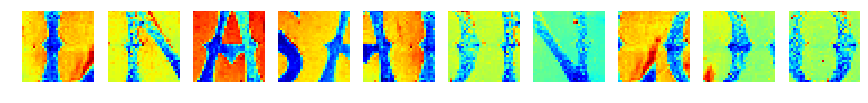

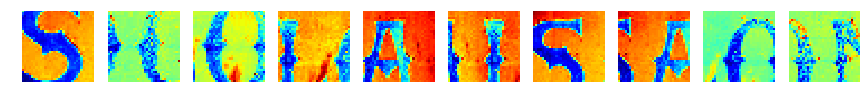

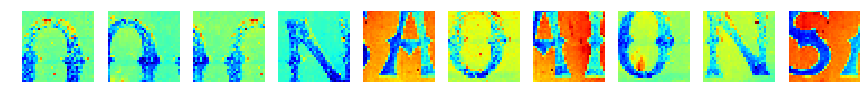

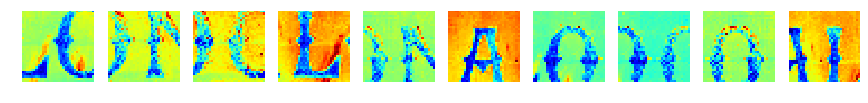

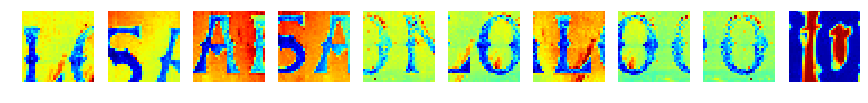

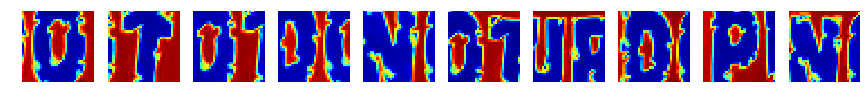

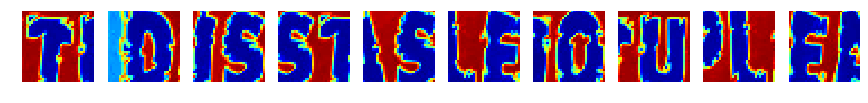

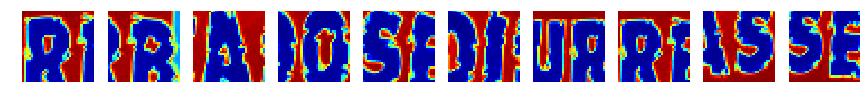

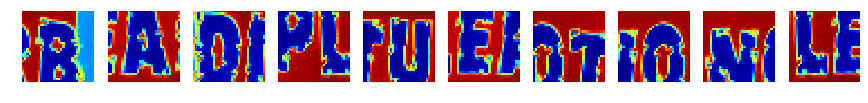

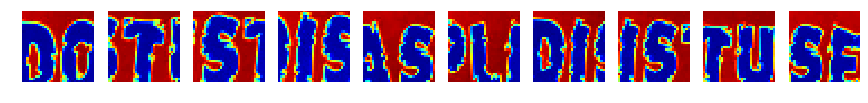

KeyboardInterrupt: 

In [11]:
bankShow(p1)

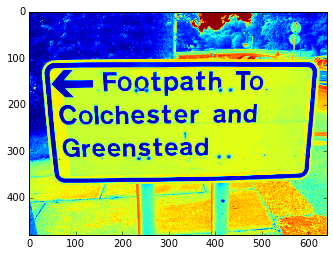

In [21]:
from scipy.misc import imread
plt.imshow(imread('../data/ft0/raw/100.jpg'))